# Sagan 2020: Python Introduction

This is a brief overview of the Jupyter notebook interface and the Python3 language. The functionality demonstrated here is quite basic and should be familiar to you. If you are struggling with any of these items, please follow the linked tutorials for more information, and/or follow up in the workshop Slack channel.

## Jupyter Overview

Each entry in a Jupyter notebook is called a cell.  

You can run the contents of individual cells by selecting them and pressing **CTRL-Enter** (or **Command-Enter** on a Mac).

You can run the contents of individual cells AND add a new cell underneath by pressing **ALT-Enter** (or **Option-Enter** on a Mac).

You can delete a cell by selecting it and pressing **d** twice.

You can add a text block like this cell by pressing **Esc-m** (or use the dropdown at the top and change from Code to Markdown).  This is useful for adding in notes that you want to remember.

You can find more information on Jupyter notebooks here: 
https://jupyter-notebook.readthedocs.io/en/stable/

As you work through the sections below, run each cell to see the results.
***

## Python Overview

The core python programming language provides a small number of built-in functions.  You can see a description of them here: https://docs.python.org/3/library/functions.html . Most of the high-level functions you will want for numerical data analysis are not built-in.  You access these by importing *packages*.  

The Anaconda distribution you installed included a large library of packages, but in order to use them you need to first import them into your current programing environment.

You can import an entire package like this:

In [2]:
import astropy

This gives you access to the *astropy* package, which provides numerous astronomical utilities.  There are sub-packages within *astropy*, such as *constants*, which contains useful astronomical constants.  You import the subpackage like this:

In [3]:
import astropy.constants
c = astropy.constants.c  #Retrieve the speed of light, and store in variable 'c'
print(c) #Print a variable using the print object
print(c.value) #Get just the value

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2014
299792458.0


You will frequently see someone do imports like this:

In [4]:
from datetime import *

This says *from the datetime package, import everything directly into the current environment.* **This is very bad, and you should not do it.**  If two different packages have functions in them that are named the same, and if you import both of them like this, then they will overwrite each other and your code will be confusing.  

*There are a few exceptions to this rule, but you will likely not encounter them in this workshop.*

***

## Mathematics

To calculate things we need to import a mathematical package.  *numpy* is the standard.

In [5]:
import numpy as np

Note that I am both importing the 'numpy' package, and changing its name (in this session) to 'np'.  This is because I am lazy and typing 'np' is faster than typing 'numpy'. (np is also the canonical abbreviation for numpy, and is what you will see in almost all online tutorials.)

You can find the documentation on the numpy package here: [https://numpy.org/devdocs/reference/index.html](https://numpy.org/devdocs/reference/index.html) . I found this by searching for 'numpy manual'.

Numpy allows you to create vector and matrix arrays:

In [6]:
v = np.array([1,2,3,4])
v

array([1, 2, 3, 4])

Note that I did not use print(v).  Instead I asked python to give me information about the object itself.  It tells me that it is *type* array, and has elements [1, 2, 3, 4]

In [7]:
print(v)

[1 2 3 4]


Print just shows the contents (as a python list).

Now make a bigger array:

In [8]:
v = np.arange(0,10000,1) #This arange call creates a long array from 0 to 10000 with step size = 1

In [9]:
v

array([   0,    1,    2, ..., 9997, 9998, 9999])

Note that python doesn't display the entire array, only the beginning and end.

***

## Uniform Distribution

Let's use numpy to generate a uniform set of 100 random numbers from -10 to 10

In [28]:
samples = np.random.uniform(-10,10,100)

Let's examine those samples:

In [11]:
print(samples)

[ 4.80275805 -4.31289498 -2.78660335 -4.27516235  5.81903814  3.48942426
  9.5844575  -6.50068878 -6.22984332  7.27871463  5.08104616 -0.10614107
  6.60823096  5.4162535  -9.82343636 -3.81016944 -8.90048795 -7.96201485
  3.77238435 -4.3322458   5.35998145  3.47449822 -8.58843156  4.56191561
  6.00769934 -3.82804798 -5.95439499 -6.55951647 -4.21792125 -2.59864346
 -8.72924194  0.35134814  4.44343666  9.56515313  9.55271774  1.77479803
 -7.4110952   0.40960815 -5.03750157 -8.33617941 -5.94906849 -8.14319732
 -9.35439012  9.73607072  1.91039988  0.35842607 -8.79544918 -0.81653003
  9.11350671  3.68035933  9.73116384  3.54772783  1.52140612  0.19395681
 -9.83741524 -2.97083329 -4.49634227  1.09969086 -9.58340918  6.36699067
 -7.32291769  9.89395002  5.19344578 -3.369236   -9.90028557 -1.99636381
 -9.95795075 -7.84549362 -7.32683273 -9.73024649  5.30448611 -2.68543163
  1.40430344 -6.98489646 -5.69159291 -0.4605048  -9.54053707  1.70395994
 -9.80971907  3.05396434 -1.83308984  6.31438885 -6

Create a histogram of those samples, with one bin per integer value:

In [24]:
bins = np.linspace(-10,10,21)

In [14]:
print(bins)

[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]


In [25]:
histogram, bins = np.histogram(samples, bins=bins)

In [16]:
print(histogram)

[11  6  5  6  5  6  4  4  3  3  6  8  0  8  3  9  4  1  1  7]


Why did we use linspace instead of array?  Read the documentation on numpy.linspace

## Plotting

Now we can use the matplotlib package to plot this distribution.  First import it, and configure it to draw within the python notebook

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

*%matplotlib inline* is known as a "magic" function. It tells matplotlib to show plots in line in the notebook interface.

We want the plot to show bin centers halfway between the edge of each bin

In [26]:
bin_centers = 0.5*(bins[1:]+bins[:-1])

In [19]:
print(bin_centers)

[-9.5 -8.5 -7.5 -6.5 -5.5 -4.5 -3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5
  4.5  5.5  6.5  7.5  8.5  9.5]


Now setup the plot.

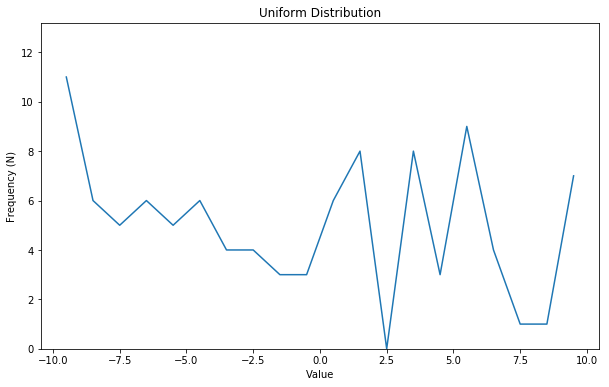

In [20]:
plt.figure(figsize=(10,6))
plt.plot()
plt.plot(bin_centers, histogram)
plt.ylim(0,np.max(histogram*1.2))
plt.xlabel('Value')
plt.ylabel('Frequency (N)')
plt.title('Uniform Distribution')
plt.show()

That doesn't look very uniform.  What happens if we increase the number of points?  Change the size of the sample in the original np.random.uniform call and re-run the notebook steps.

When plotting histograms, it is useful for the plot to not play 'connect-the-dots'.  Rather, we want *step* style plots.

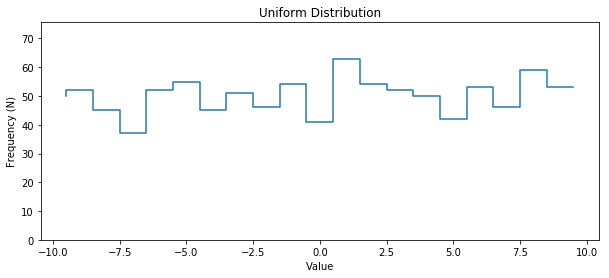

In [27]:
plt.figure(figsize=(10,4))
plt.plot()
plt.step(bin_centers, histogram)
plt.ylim(0,np.max(histogram*1.2))
plt.xlabel('Value')
plt.ylabel('Frequency (N)')
plt.title('Uniform Distribution')
plt.show()

## Gaussian Distribution

Now change from a uniform distribution to a normal (or Gaussian) distribution

In [29]:
samples = np.random.normal(0,2.5,100000)

Note that the function parameters for 'normal' are different than for uniform.  Use the numpy manual to figure out what they are.

In [30]:
print(samples)

[ 1.52218735 -0.34444255 -1.13861412 ...  0.10224828 -1.77581707
  3.71933733]


In [31]:
histogram, bins = np.histogram(samples, bins=bins)

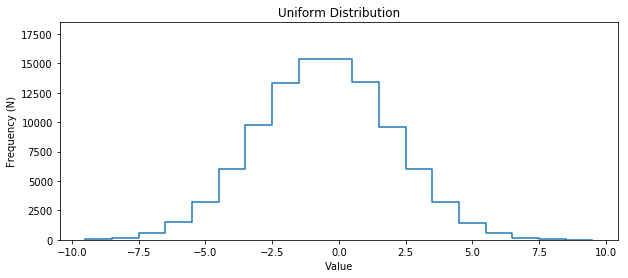

In [32]:
plt.figure(figsize=(10,4))
plt.plot()
plt.step(bin_centers, histogram)
plt.ylim(0,np.max(histogram*1.2))
plt.xlabel('Value')
plt.ylabel('Frequency (N)')
plt.title('Normal Distribution')
plt.show()

Experiment with changing the standard deviation and center location of the distribution.  You may need to change the range of the bins.  Insert the required code into the notebook above the plotting section.

***

## Conclusion: 

This has been a simple introductory tutorial to Python and Jupyter notebooks. If you want more information about the packages we used, see the following on-line tutorials:

*Python*: http://introtopython.org/. The *Python Essentials* menu contains a list of tutorials that discuss variables, functions, syntax, and code structure.

*Matplotlib*: the tutorials at: https://matplotlib.org/tutorials/introductory/pyplot.html

You can find more information on *Jupyter notebooks* here: 
https://jupyter-notebook.readthedocs.io/en/stable/